In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple
import tools
from analysis_tools import check_data

from tools.FV3_tools import read_solo_fields
from tools.WRF_tools import read_wrf_fields
from tools.CM1_tools import read_cm1_fields

import pickle
from tools.cbook import pickle2Obj

_nthreads = 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#models['mpas'] = pickle2Obj('precip/mpas_squall_3km_3rd_bench.pkl',retObj=False)

In [4]:
#check_data(models)

In [2]:
from scipy.stats import gaussian_kde

def precip_histogram(models, label, all_times=False):
    
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(7,7))
    
    if all_times:
        xlim = [0.01, 200.]
            
    else:
        xlim = [0.01, 100.]
    
    for key in models.keys():
        
        if all_times:
            
            precip_dt = models[key][label]['accum_prec']
            
        else:
    
        # first, compute the increments in time of precip
    
            inv = models[key][label]['accum_prec'][::-1]
    
            precip_dt = inv[0:-1] - inv[1:]
        
        # get rid of zeros...
    
        data_flat =precip_dt.flatten()
        
        data_no_zero = data_flat[data_flat >= 1.0e-1]
        
        hist, bin_edges = np.histogram(data_no_zero)

        eval_points = np.linspace(np.min(bin_edges), np.max(bin_edges))
        kde_sp      = gaussian_kde(data_no_zero, bw_method=0.9)
        y_sp        = kde_sp.pdf(eval_points)
        
        if key == 'solo':
            ax.plot(eval_points, y_sp, color='r', linewidth=2.0, label='SOLO (%d)' % data_no_zero.shape)
            
        if key == 'solo_hdd012':
            ax.plot(eval_points, y_sp, color='darkred', linewidth=2.0, linestyle=':', label='SOLO-D012 (%d)' % data_no_zero.shape)
        
        if key == 'solo_hdd125':
            ax.plot(eval_points, y_sp, color='red', linewidth=2.0, linestyle='solid', label='SOLO-D125 (%d)' % data_no_zero.shape)

        if key == 'wrf':
            ax.plot(eval_points, y_sp, color='k', linewidth=1.0, label='WRF (%d)' % data_no_zero.shape)
            
        if key == 'cm1':
            ax.plot(eval_points, y_sp, color='b', linewidth=1.0, label='CM1 (%d)' % data_no_zero.shape)

        if key == 'cm1_hdd012':
            ax.plot(eval_points, y_sp, color='b', linewidth=2.0, label='CM1-D012 (%d)' % data_no_zero.shape)

        if key == 'cm1_hdd125':
            ax.plot(eval_points, y_sp, color='darkblue', linewidth=2.0, linestyle=':', label='CM1-D125 (%d)' % data_no_zero.shape)

        if key == 'mpas':
            ax.plot(eval_points, y_sp, color='g', linewidth=2.0, label='MPAS (%d)' % data_no_zero.shape)
    
    ax.set_xlim(xlim[:])
    ax.set_yscale("log")
#    ax.set_xscale("log", base=2.0)
    plt.grid(axis='y', alpha=0.75)
    plt.grid(axis='x', alpha=0.75)
    ax.set_xlabel('mm',fontsize=15)
    ax.set_ylabel('Density',fontsize=15)
    legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
    if all_times:
        ax.axvline(x=100.0, color='k', linestyle='--', linewidth=2.0)
        ax.axvline(x=150.0, color='k', linestyle='--', linewidth=2.0)
        ax.set_title('Accum Precipitation for EXP:  %s' % (label), fontsize=15)
        plt.savefig("Total_Accumlated_Precipitation_KDE_Experiment_%s.png" % (label))
    else:
        ax.axvline(x=40.0, color='k', linestyle='--', linewidth=2.0)
        ax.axvline(x=80.0, color='k', linestyle='--', linewidth=2.0)
        ax.set_title('15 Minute Accumlated Precipitation KDE for EXP:  %s' % (label), fontsize=15)
        plt.savefig("15_Minute_Accumlated_Precipitation_KDE_Experiment_%s.png" % (label))
    
    plt.show()
    


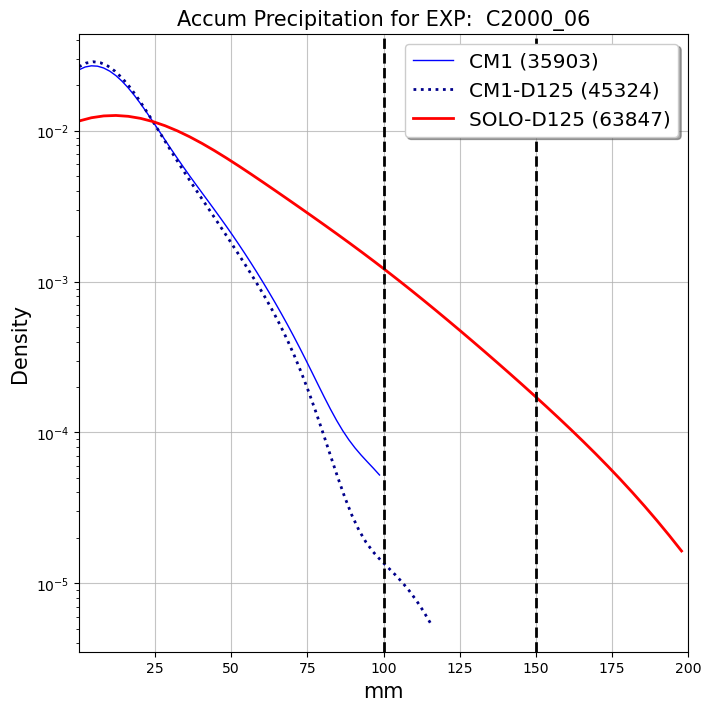

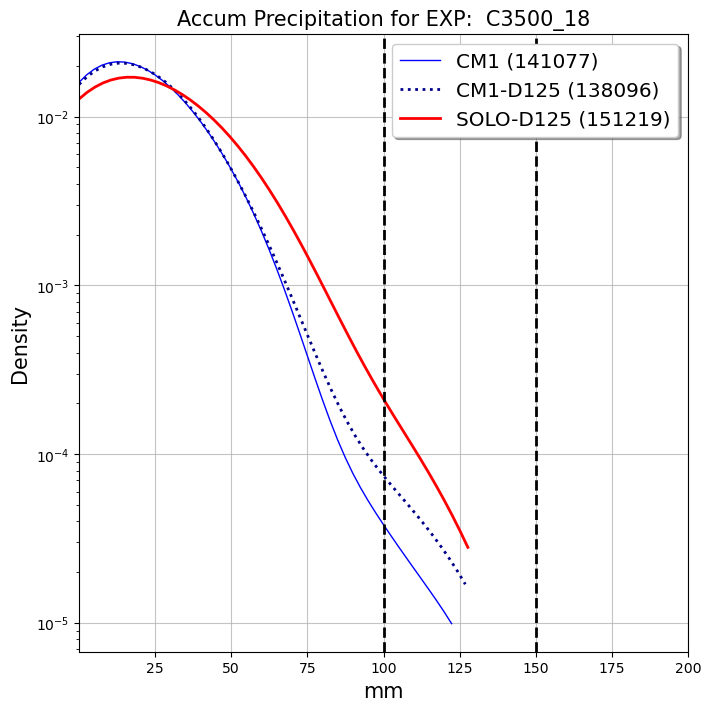

In [3]:
models = {}

#models['wrf'] = pickle2Obj('precip/wrf_squall_3km_dt10_dbz99.pkl', retObj=False)

models['cm1'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd012_dbz99.pkl',retObj=False)
# models['cm1_hdd012'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd012_dbz99.pkl',retObj=False)
models['cm1_hdd125'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd125_dbz99.pkl',retObj=False)

# models['solo_hdd012'] = pickle2Obj('precip/solo_squall_3km_dt20_hdd012_dbz99.pkl',retObj=False)
models['solo_hdd125'] = pickle2Obj('precip/solo_squall_3km_dt20_hdd125_dbz99.pkl',retObj=False)


#precip_histogram(models, 'C1500_06')
# precip_histogram(models, 'C2000_06')
# precip_histogram(models, 'C3500_06')
precip_histogram(models, 'C2000_06', all_times = True)
# precip_histogram(models, 'C3500_06', all_times = True)
# precip_histogram(models, 'C2500_06')
# precip_histogram(models, 'C3000_06')

#precip_histogram(models, 'C2000_12')
#precip_histogram(models, 'C2000_06', all_times = True)
#precip_histogram(models, 'C2000_18')
#precip_histogram(models, 'C2000_12')
#precip_histogram(models, 'C2000_18')

#precip_histogram(models, 'C2000_12')

#precip_histogram(models, 'C3500_18')
#precip_histogram(models, 'C2000_12')
precip_histogram(models, 'C3500_18', all_times = True)

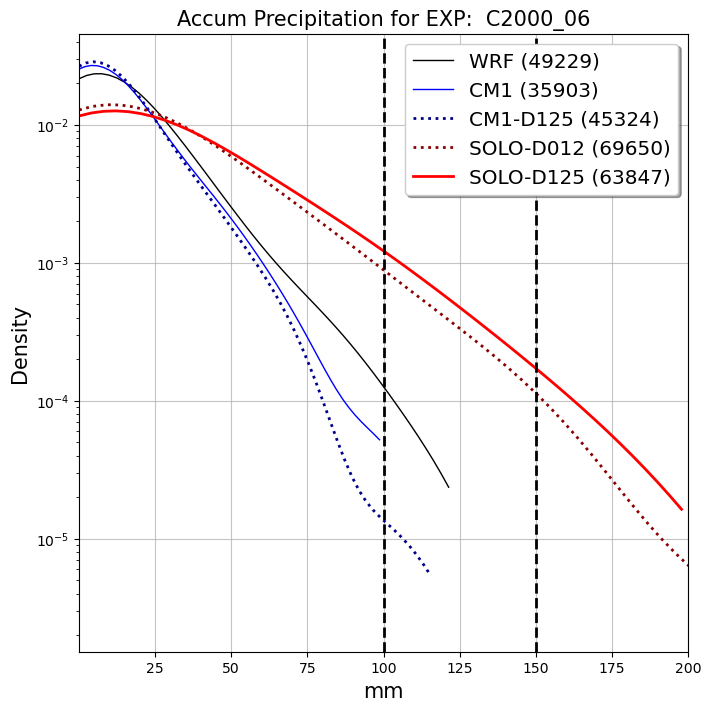

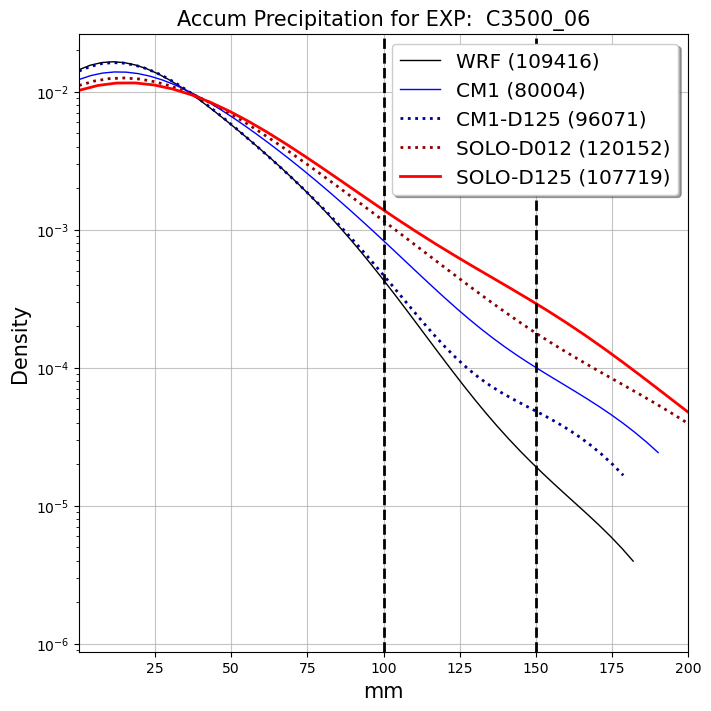

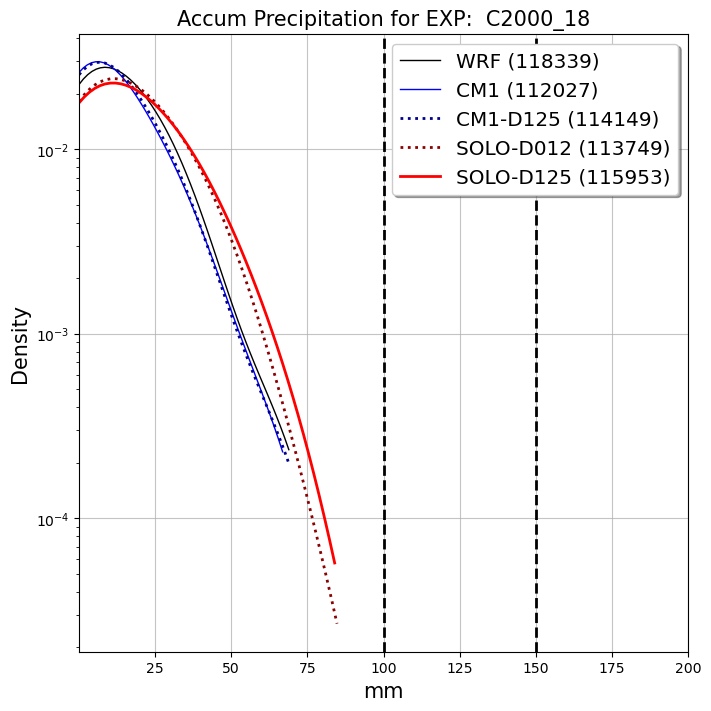

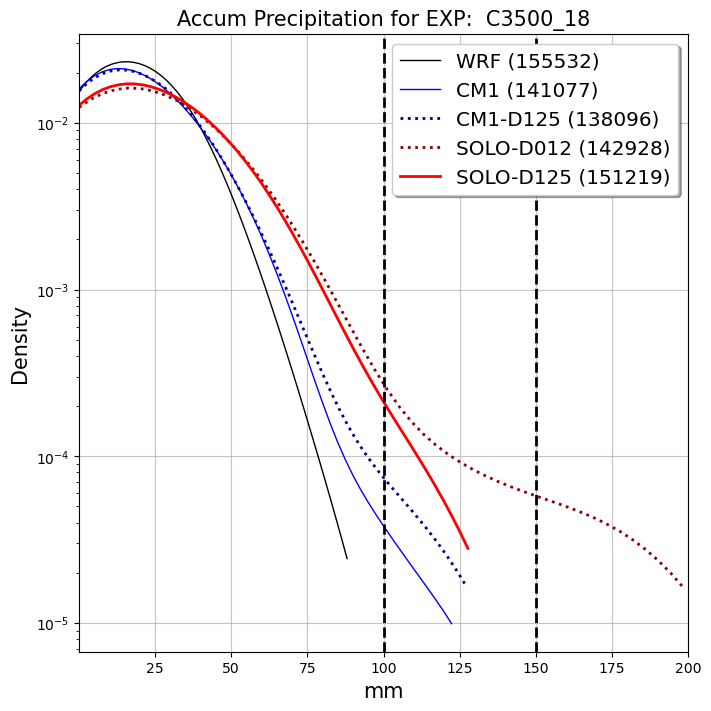

In [7]:
models = {}

models['wrf'] = pickle2Obj('precip/wrf_squall_3km_dt10_dbz99.pkl', retObj=False)

models['cm1'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd012_dbz99.pkl',retObj=False)
#models['cm1_hdd012'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd012_dbz99.pkl',retObj=False)
models['cm1_hdd125'] = pickle2Obj('precip/cm1_squall_3km_dt10_hdd125_dbz99.pkl',retObj=False)

models['solo_hdd012'] = pickle2Obj('precip/solo_squall_3km_dt20_hdd012_dbz99.pkl',retObj=False)
models['solo_hdd125'] = pickle2Obj('precip/solo_squall_3km_dt20_hdd125_dbz99.pkl',retObj=False)


#precip_histogram(models, 'C1500_06')
# precip_histogram(models, 'C2000_06')
# precip_histogram(models, 'C3500_06')
precip_histogram(models, 'C2000_06', all_times = True)
precip_histogram(models, 'C3500_06', all_times = True)
# precip_histogram(models, 'C2500_06')
# precip_histogram(models, 'C3000_06')

#precip_histogram(models, 'C2000_12')
#precip_histogram(models, 'C2000_06', all_times = True)
precip_histogram(models, 'C2000_18', all_times = True)
#precip_histogram(models, 'C2000_12')
#precip_histogram(models, 'C2000_18')

#precip_histogram(models, 'C2000_12')

#precip_histogram(models, 'C3500_18')
#precip_histogram(models, 'C2000_12')
precip_histogram(models, 'C3500_18', all_times = True)

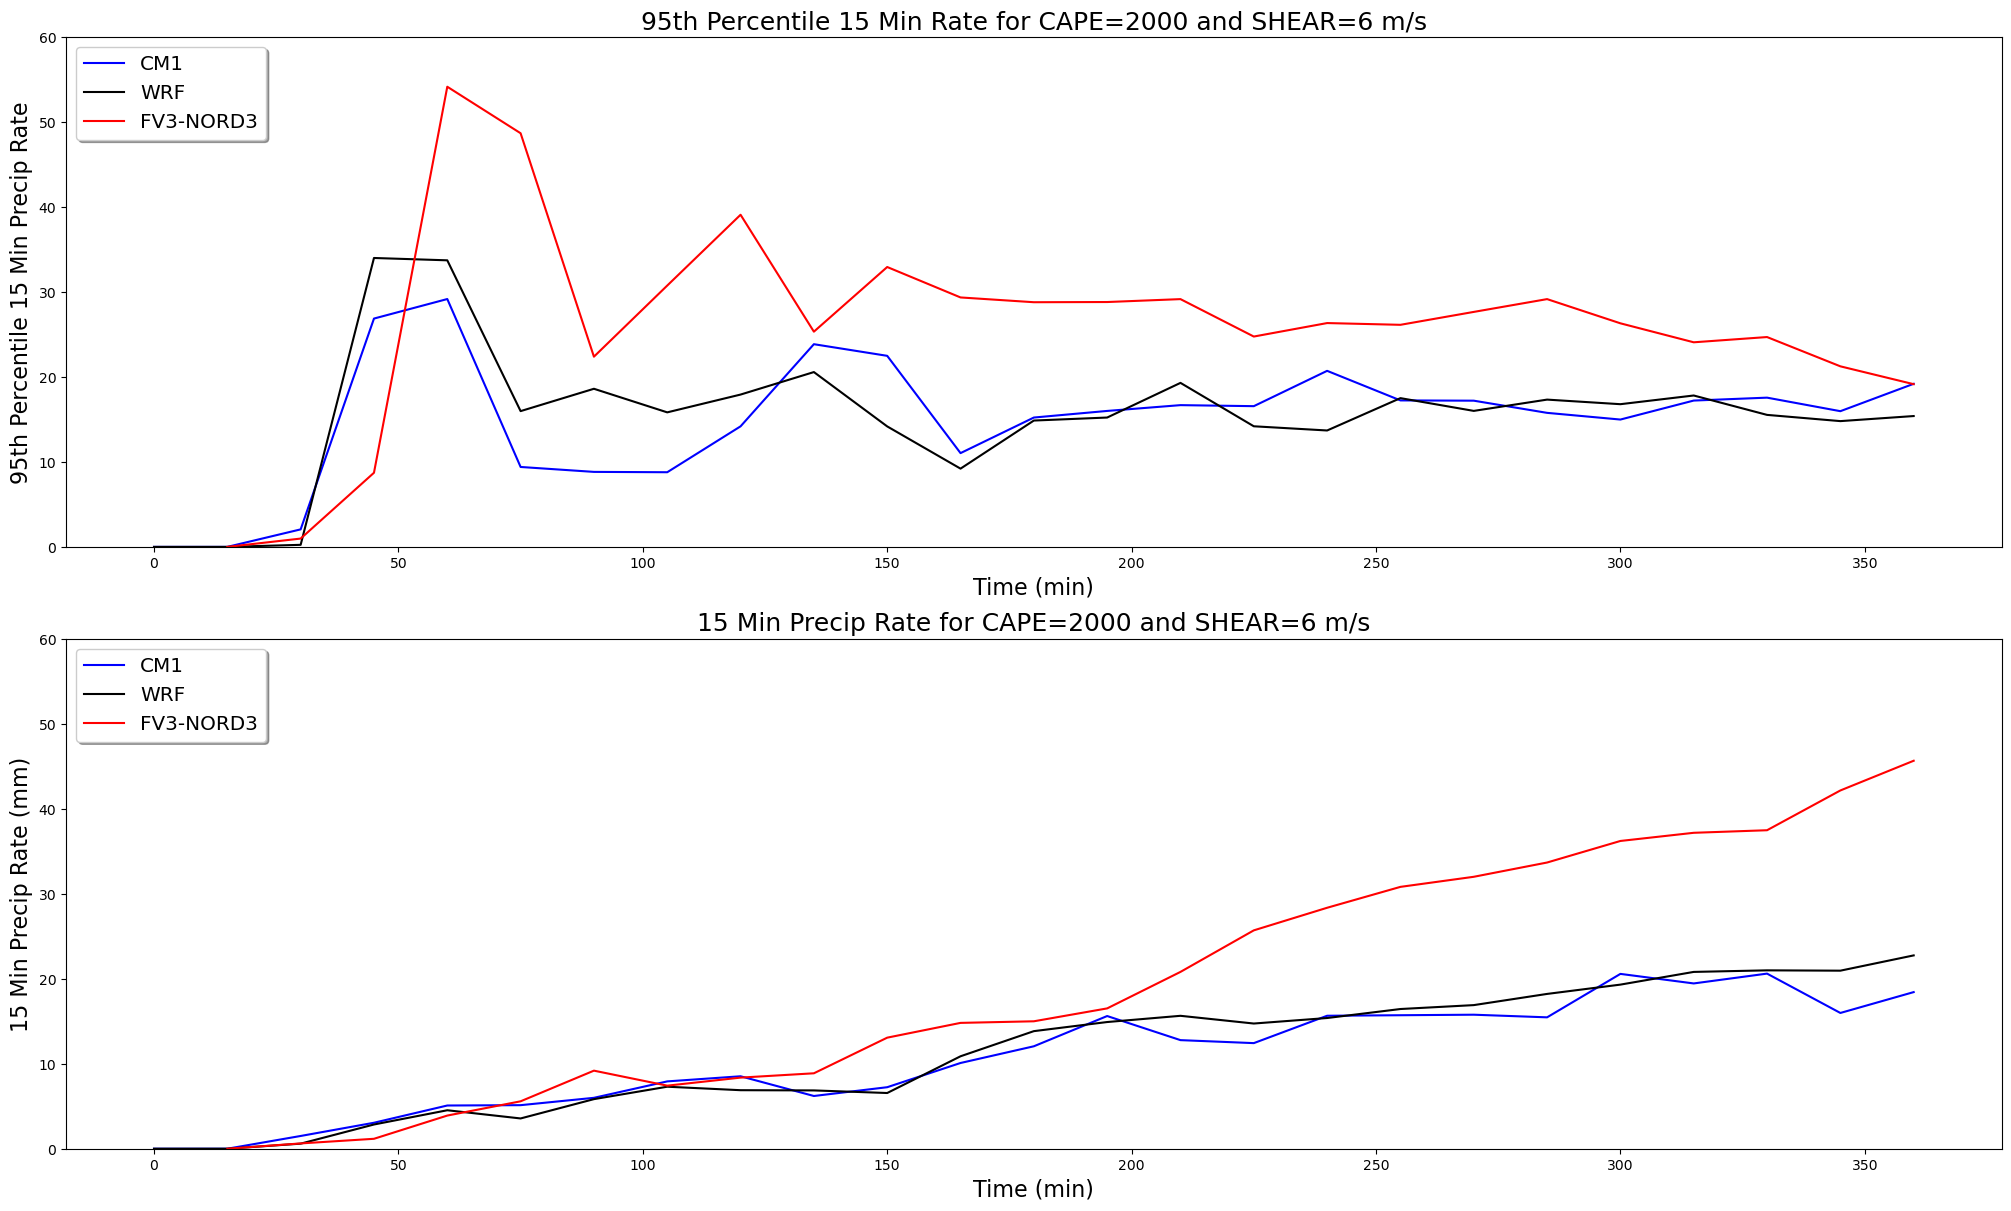

In [8]:
allcape = ("C2000",)
allshear = ("06",)

percent = 0.95

def plot_accum_prec(models, allcape, allshear, all_times=False):
    
    x = np.arange(5)

    if all_times:
        plim = [ [3.0e5, 5.0e5], [4.0e5, 6.5e5] ]
    else:
        plim = [ [60, 60], [60, 60] ]
        qlim = [ [60, 60], [60, 60] ]

    labels = []
    
    for cape in allcape:
        labels.append("%s" % (cape[1:]))
        
    for m, shear in enumerate(allshear):
        
        for n, cape in enumerate(allcape):
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(2,1, constrained_layout=True,figsize=(20,12))

            for key in models.keys():
                
                if all_times:
                    precip = models[key][label]['accum_prec']
                else:
                    inv       = models[key][label]['accum_prec'][::-1]
                    ppp       = np.zeros_like(inv)
                    precip    = np.ma.zeros_like(inv)
                    ppp[1:,:] = (inv[0:-1] - inv[1:])[::-1]
                    precip    = np.ma.masked_greater(ppp, 1.0e-1)
                
                    precip_percent = np.zeros((ppp.shape[0],))
                    
                    for k in np.arange(ppp.shape[0]):
                        ptime   = ppp[k].reshape(precip.shape[1]*precip.shape[2])
                        pthresh = ptime[ptime > 1.0e-01]
                        
                        psort   = np.sort(pthresh)
                        idx     = np.int(percent * psort.shape[0])
                        if idx > 0:
                            precip_percent[k] = np.mean(psort[idx:])
                        else:
                            precip_percent[k] = 0.0
                                            
                if key == 'solo':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='r', linestyle='-', label='FV3-NORD3')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='r', linestyle='-', label='FV3-NORD3')
                    
                if key == 'solo2':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='r', linestyle='--', label='FV3-NORD2')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='r', linestyle='--', label='FV3-NORD2')
                    
                if key == 'solo1':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='r', linestyle=':', label='FV3-NORD1')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='r', linestyle=':', label='FV3-NORD1')

                if key == 'cm1':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='b', linestyle='-', label='CM1')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='b', linestyle='-', label='CM1')
            
                if key == 'wrf':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='k', linestyle='-', label='WRF')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='k', linestyle='-', label='WRF')
                        
                if key == 'mpas':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='g', linestyle='-', label='MPAS')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='g', linestyle='-', label='MPAS')
                        
            ax[0].set_ylabel('95th Percentile 15 Min Precip Rate', fontsize=16)
            ax[1].set_ylabel('15 Min Precip Rate (mm)', fontsize=16)
            ax[0].set_title('95th Percentile 15 Min Rate for CAPE=%d and SHEAR=%d m/s' % (int(cape[1:]), int(shear)), fontsize=18)
            ax[1].set_title('15 Min Precip Rate for CAPE=%d and SHEAR=%d m/s' % (int(cape[1:]), int(shear)), fontsize=18)
            ax[0].set_ylim(0, qlim[m][n])
            ax[1].set_ylim(0, plim[m][n])
            
            for k in [0,1]:
                ax[k].set_xlabel('Time (min)', fontsize=16)
                
                legend = ax[k].legend(loc='upper left', shadow=True, fontsize='x-large')
            
            plt.savefig("Precipitation_Time_Series_Experiment_%s.png" % (label))
            plt.show()
            
###############################

plot_accum_prec(models, allcape, allshear, all_times=False)

In [18]:
from scipy.stats import gaussian_kde

def precip_kde2(models, keys, labels, all_times=False):
    
    fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))
    
    if all_times:
        xlim = [0.0, 350.]
            
    else:
        xlim = [0.0, 100.]
    
    for key in keys:
        
        for label in labels:
        
            if all_times:

                precip_dt = models[key][label]['accum_prec']

            else:

            # first, compute the increments in time of precip

                inv = models[key][label]['accum_prec'][::-1]

                precip_dt = inv[0:-1] - inv[1:]

            # get rid of zeros...

            data_flat =precip_dt.flatten()

            data_no_zero = data_flat[data_flat >= 1.0e-1]

            hist, bin_edges = np.histogram(data_no_zero)

            eval_points = np.linspace(np.min(bin_edges), np.max(bin_edges))
            kde_sp      = gaussian_kde(data_no_zero, bw_method=0.5)
            y_sp        = kde_sp.pdf(eval_points)

            if label == 'C2000_06':
                ax.plot(eval_points, y_sp, color='r', linewidth=2.0, label='%s  %s' % (key, label))

            if label == 'C1500_06':
                ax.plot(eval_points, y_sp, color='r', linewidth=2.0, linestyle='--', label='%s  %s' % (key, label))

            if label == 'C2500_06':
                ax.plot(eval_points, y_sp, color='b', linewidth=2.0, linestyle='-', label='%s  %s' % (key, label))
                
            if label == 'C3000_06':
                ax.plot(eval_points, y_sp, color='b', linewidth=2.0, linestyle='--', label='%s  %s' % (key, label))

            if label == 'C3500_06':
                ax.plot(eval_points, y_sp, color='k', linewidth=2.0, label='%s  %s' % (key, label))

        ax.set_xlim(xlim[:])
        ax.set_yscale("log")
        ax.axvline(x=40.0, color='k', linestyle='--', linewidth=2.0)
        ax.axvline(x=80.0, color='k', linestyle='--', linewidth=2.0)
        plt.grid(axis='y', alpha=0.75)
        plt.grid(axis='x', alpha=0.75)
        ax.set_xlabel('mm',fontsize=15)
        ax.set_ylabel('Density',fontsize=15)
        legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
        if all_times:
            ax.set_title('Accumulated Precipitation KDE for EXP:  %s' % (label), fontsize=15)
            plt.savefig("Total_Accumlated_Precipitation_KDE_Experiment_%s.png" % (label))
        else:
            ax.set_title('15 Minute Accumlated Precipitation KDE for EXP:  %s' % (label), fontsize=15)
            plt.savefig("15_Minute_Accumlated_Precipitation_KDE_Experiment_%s.png" % (label))

        plt.show()



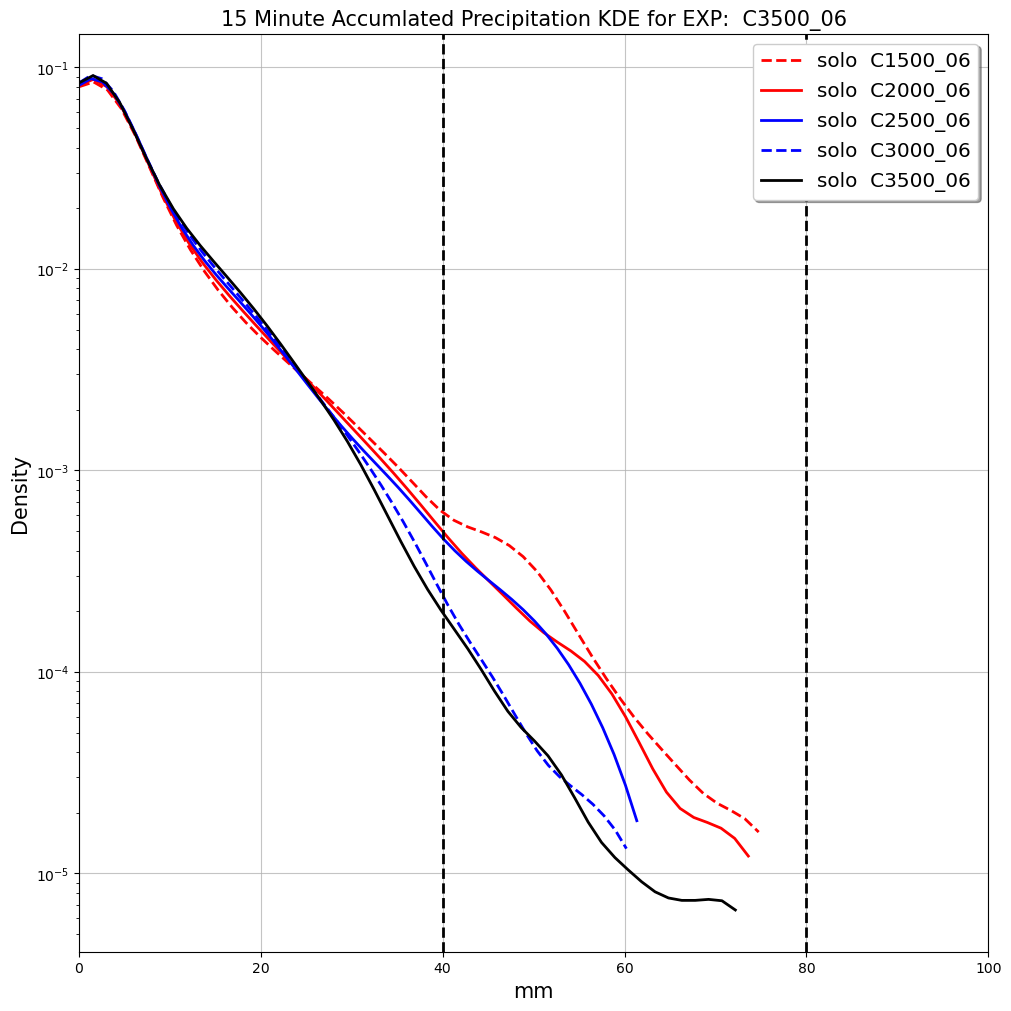

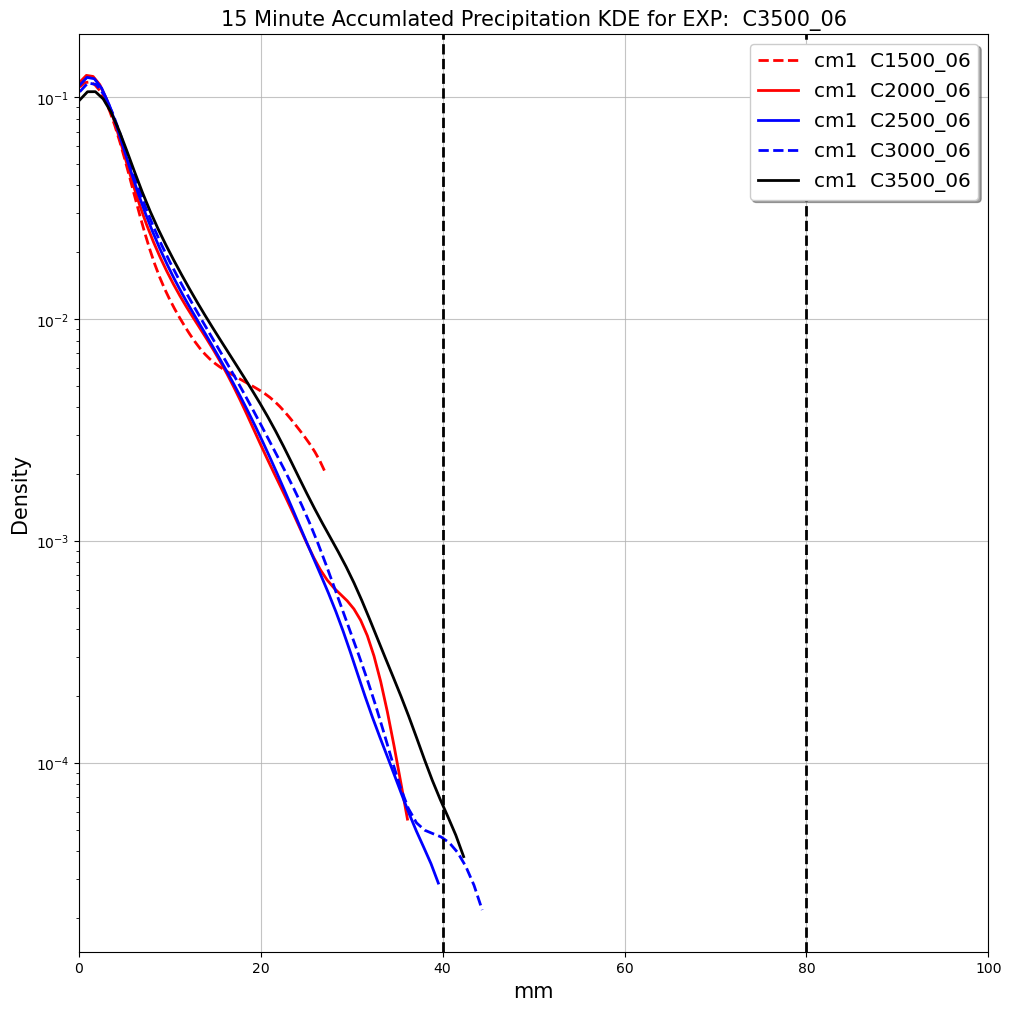

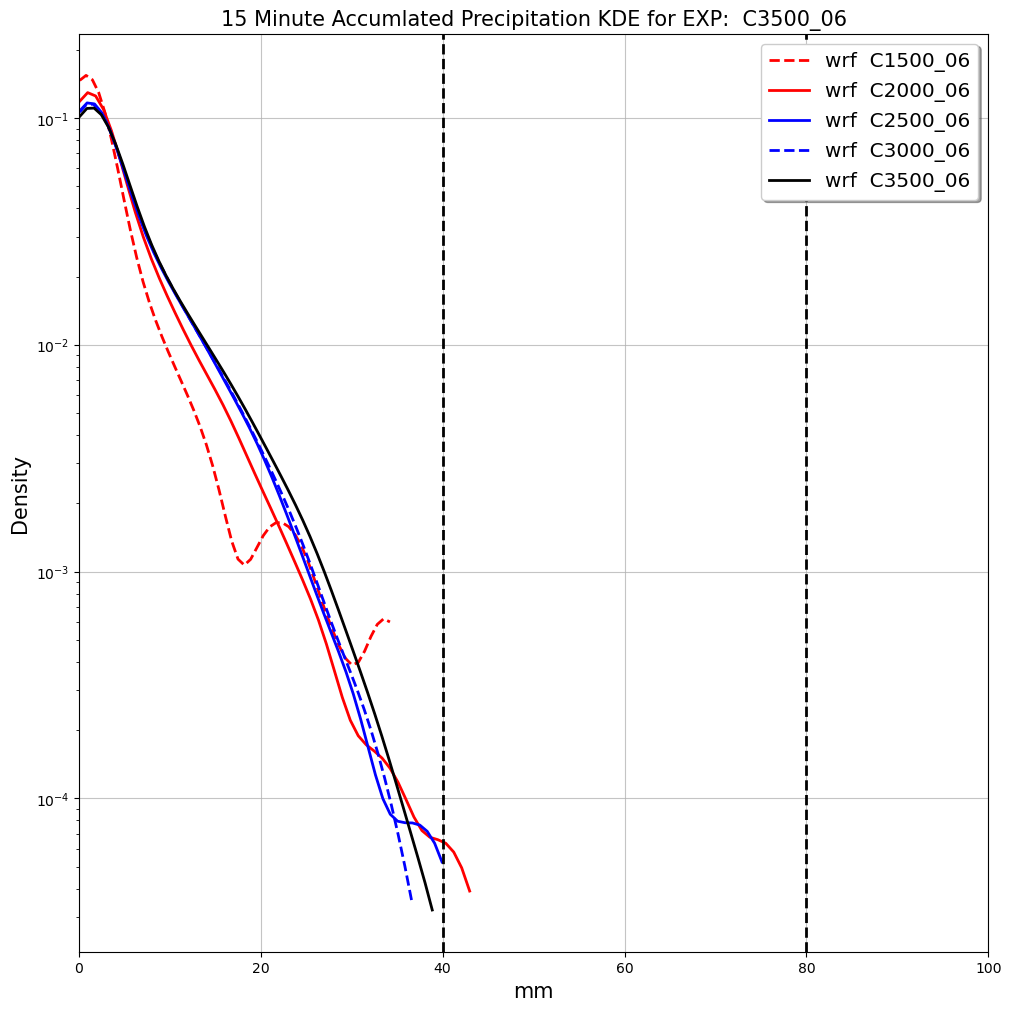

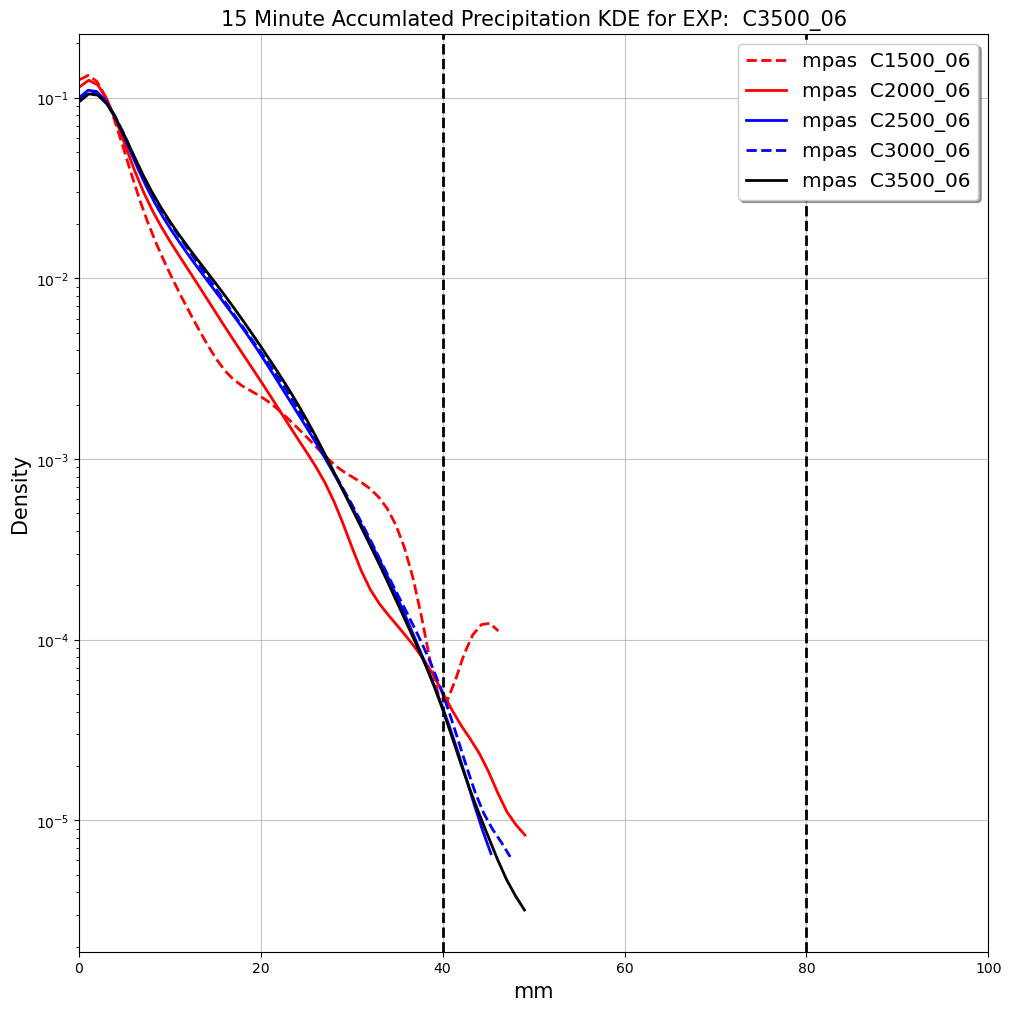

In [21]:
precip_kde2(models, ['solo',], ['C1500_06','C2000_06', 'C2500_06', 'C3000_06', 'C3500_06'], all_times=False)
precip_kde2(models, ['cm1',], ['C1500_06','C2000_06', 'C2500_06', 'C3000_06', 'C3500_06'], all_times=False)
precip_kde2(models, ['wrf',], ['C1500_06','C2000_06', 'C2500_06', 'C3000_06', 'C3500_06'], all_times=False)
precip_kde2(models, ['mpas',], ['C1500_06','C2000_06', 'C2500_06', 'C3000_06', 'C3500_06'], all_times=False)

In [10]:
def precip_bar(models, labels, time=-1, mean=False, log=False):
    
    barWidth = 0.15
    
    fig, ax = plt.subplots(2,1, constrained_layout=True,figsize=(12,8))
    
    xbar1 = np.arange(len(labels)) - barWidth
    xbar2 = [x + barWidth for x in xbar1]
    xbar3 = [x + barWidth for x in xbar2]
    xbar4 = [x + barWidth for x in xbar3]
  
    capes  = labels
    
# create precip data
        
    for key in models.keys():
        
        precip = []
        
        if key == 'solo':
            xloc = xbar1
            color = 'r'
            if time != -1:
                time = time - 1
        if key == 'cm1':
            xloc = xbar2
            color = 'b'
            
        if key == 'wrf':
            xloc = xbar3
            color = 'k'

        if key == 'mpas':
            xloc = xbar4
            color = 'g'

        for label in labels:
                        
            if mean == False:
                if log == False:
                    precip.append(models[key][label]['accum_prec'][time].sum())
                else:
                    precip.append(np.log(models[key][label]['accum_prec'][time].sum()))
            else:
                precip.append(models[key][label]['accum_prec'][time].mean())
                
        ax[0].bar(xloc, precip, color =color, width = barWidth)
        ax[0].set_xticks([r + barWidth for r in range(len(labels))], labels)
        ax[0].set_xlabel('CAPE',fontsize=15)
        if log:
            ax[0].set_ylabel('Log of Accum Precipitation (mm)',fontsize=15)
        else:
            ax[0].set_ylabel('Accum Precipitation (mm)',fontsize=15)
        
        ax[1].plot(xloc, precip, color=color)
        ax[1].set_xticks([r + barWidth for r in range(len(labels))], labels)
        ax[1].set_xlabel('CAPE',fontsize=15)
        if log:
            ax[1].set_ylabel('Log of Accum Precipitation (mm)',fontsize=15)
        else:
            ax[1].set_ylabel('Accum Precipitation (mm)',fontsize=15)

        

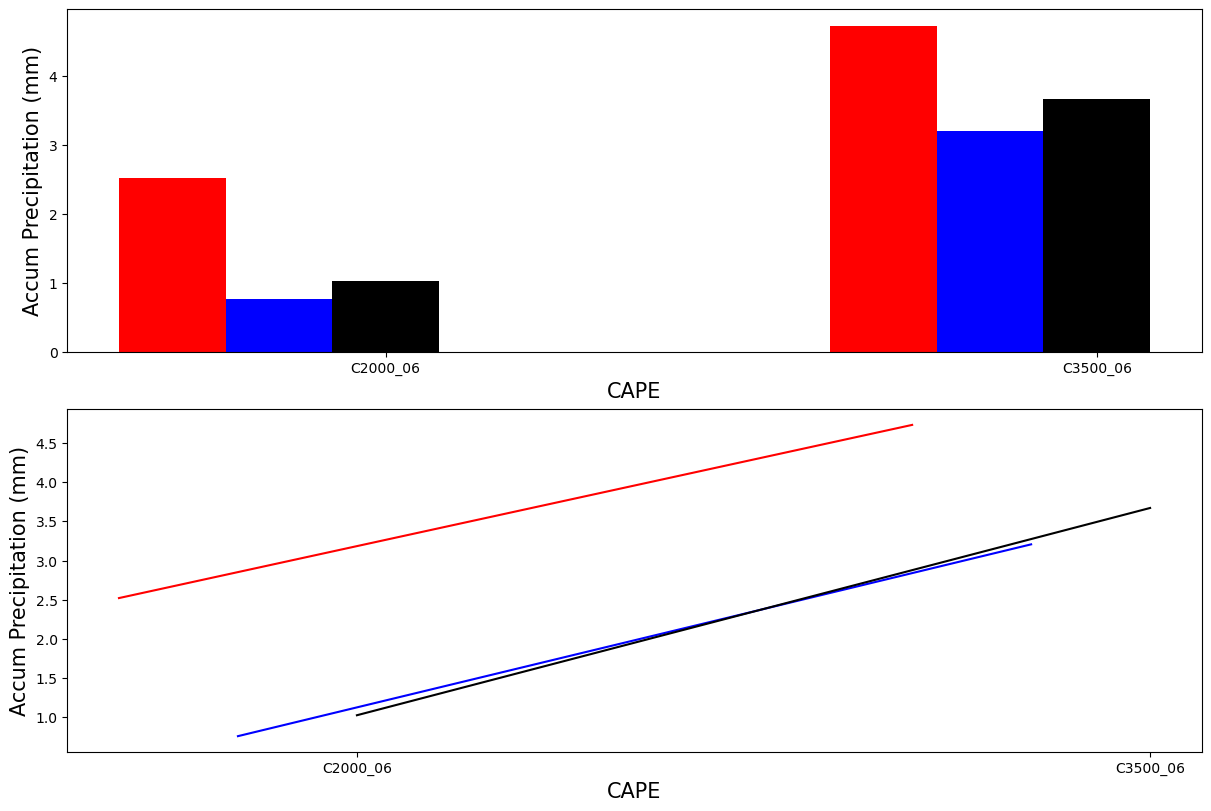

In [11]:
precip_bar(models, ['C2000_06',  'C3500_06'], time=-1, mean=True, log=False)
#precip_bar(models, ['cm1',], ['C1500_06','C2000_06', 'C2500_06', 'C3000_06', 'C3500_06'], time=4)

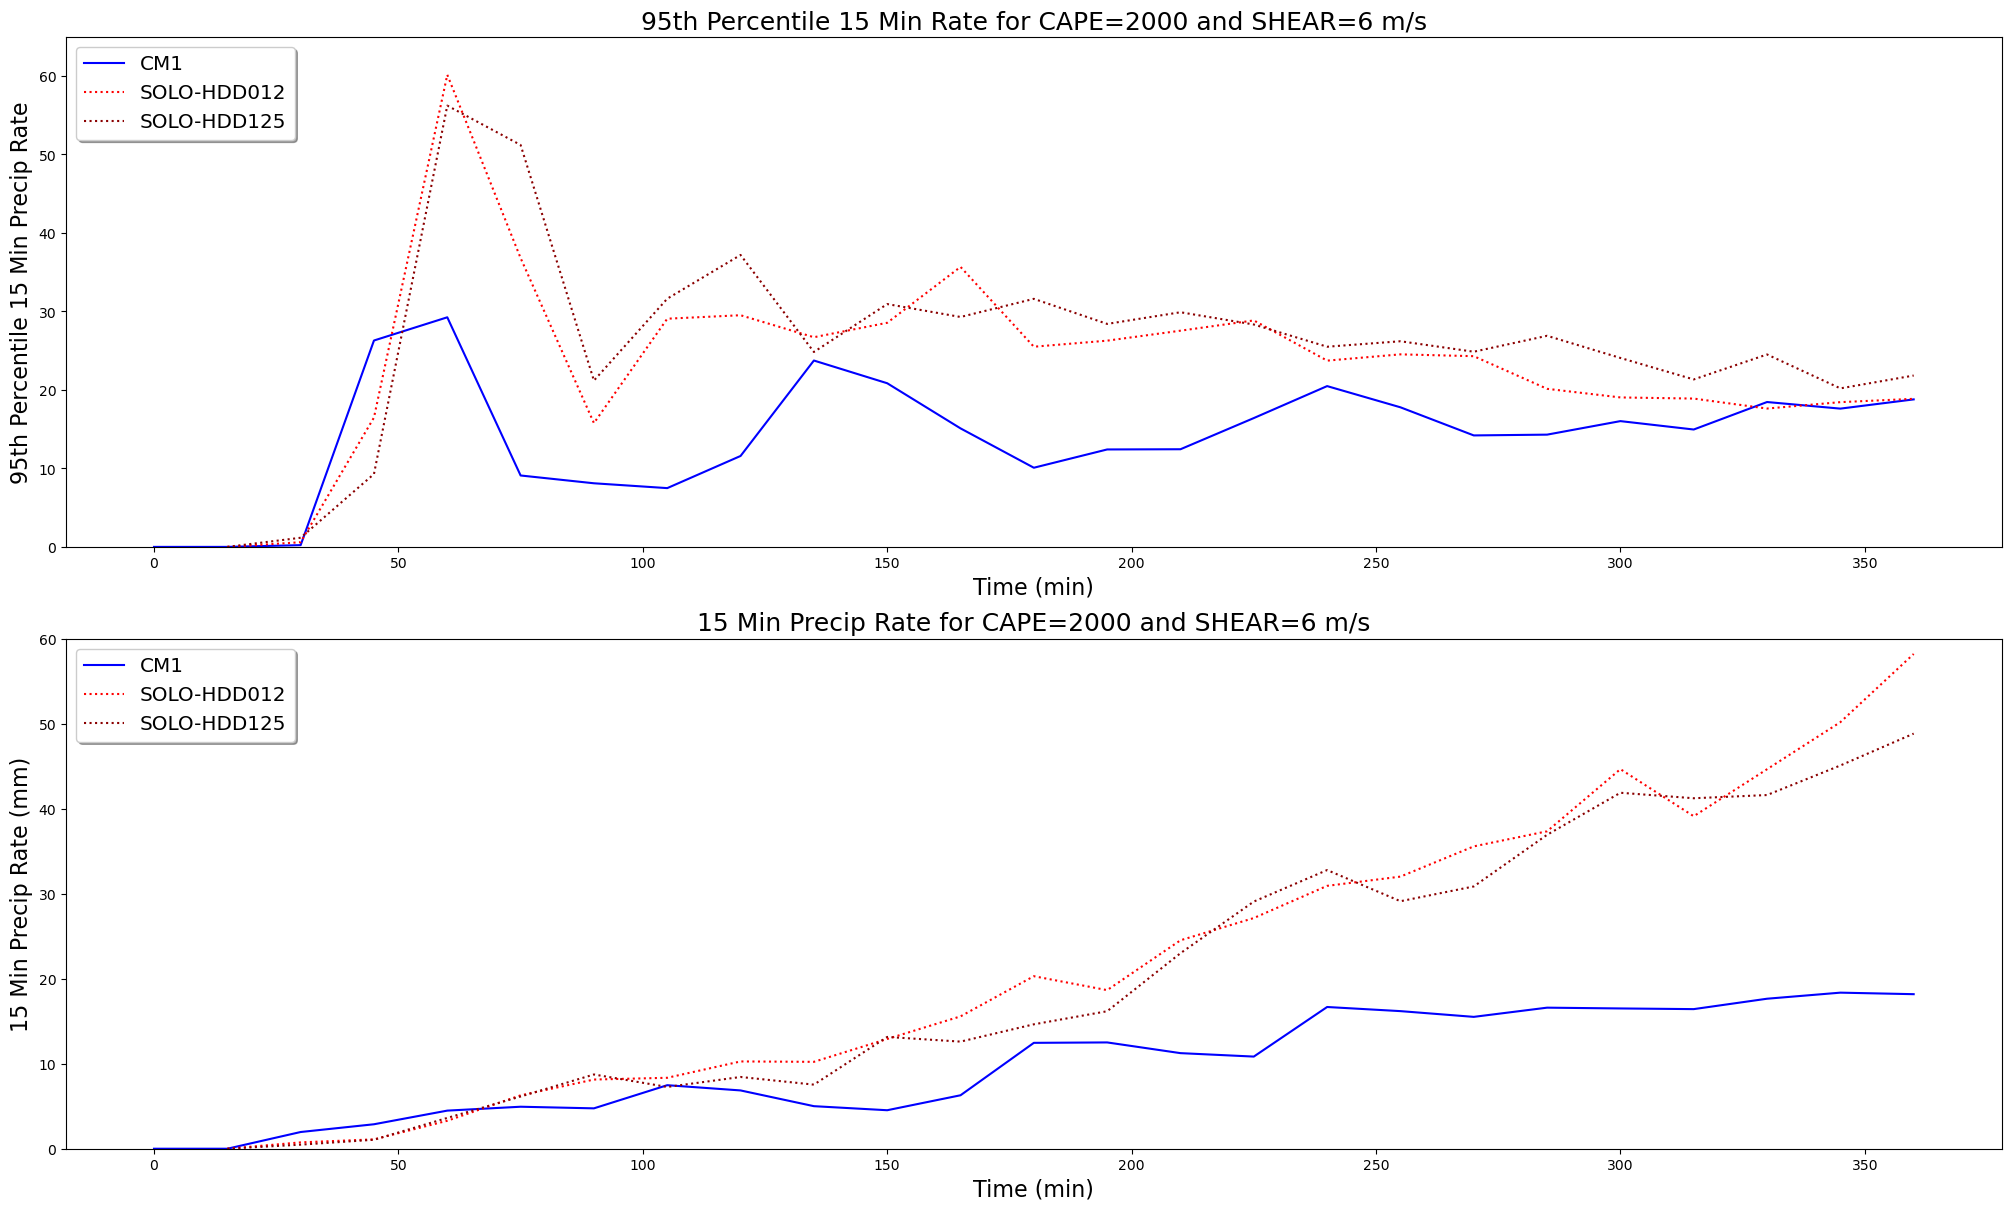

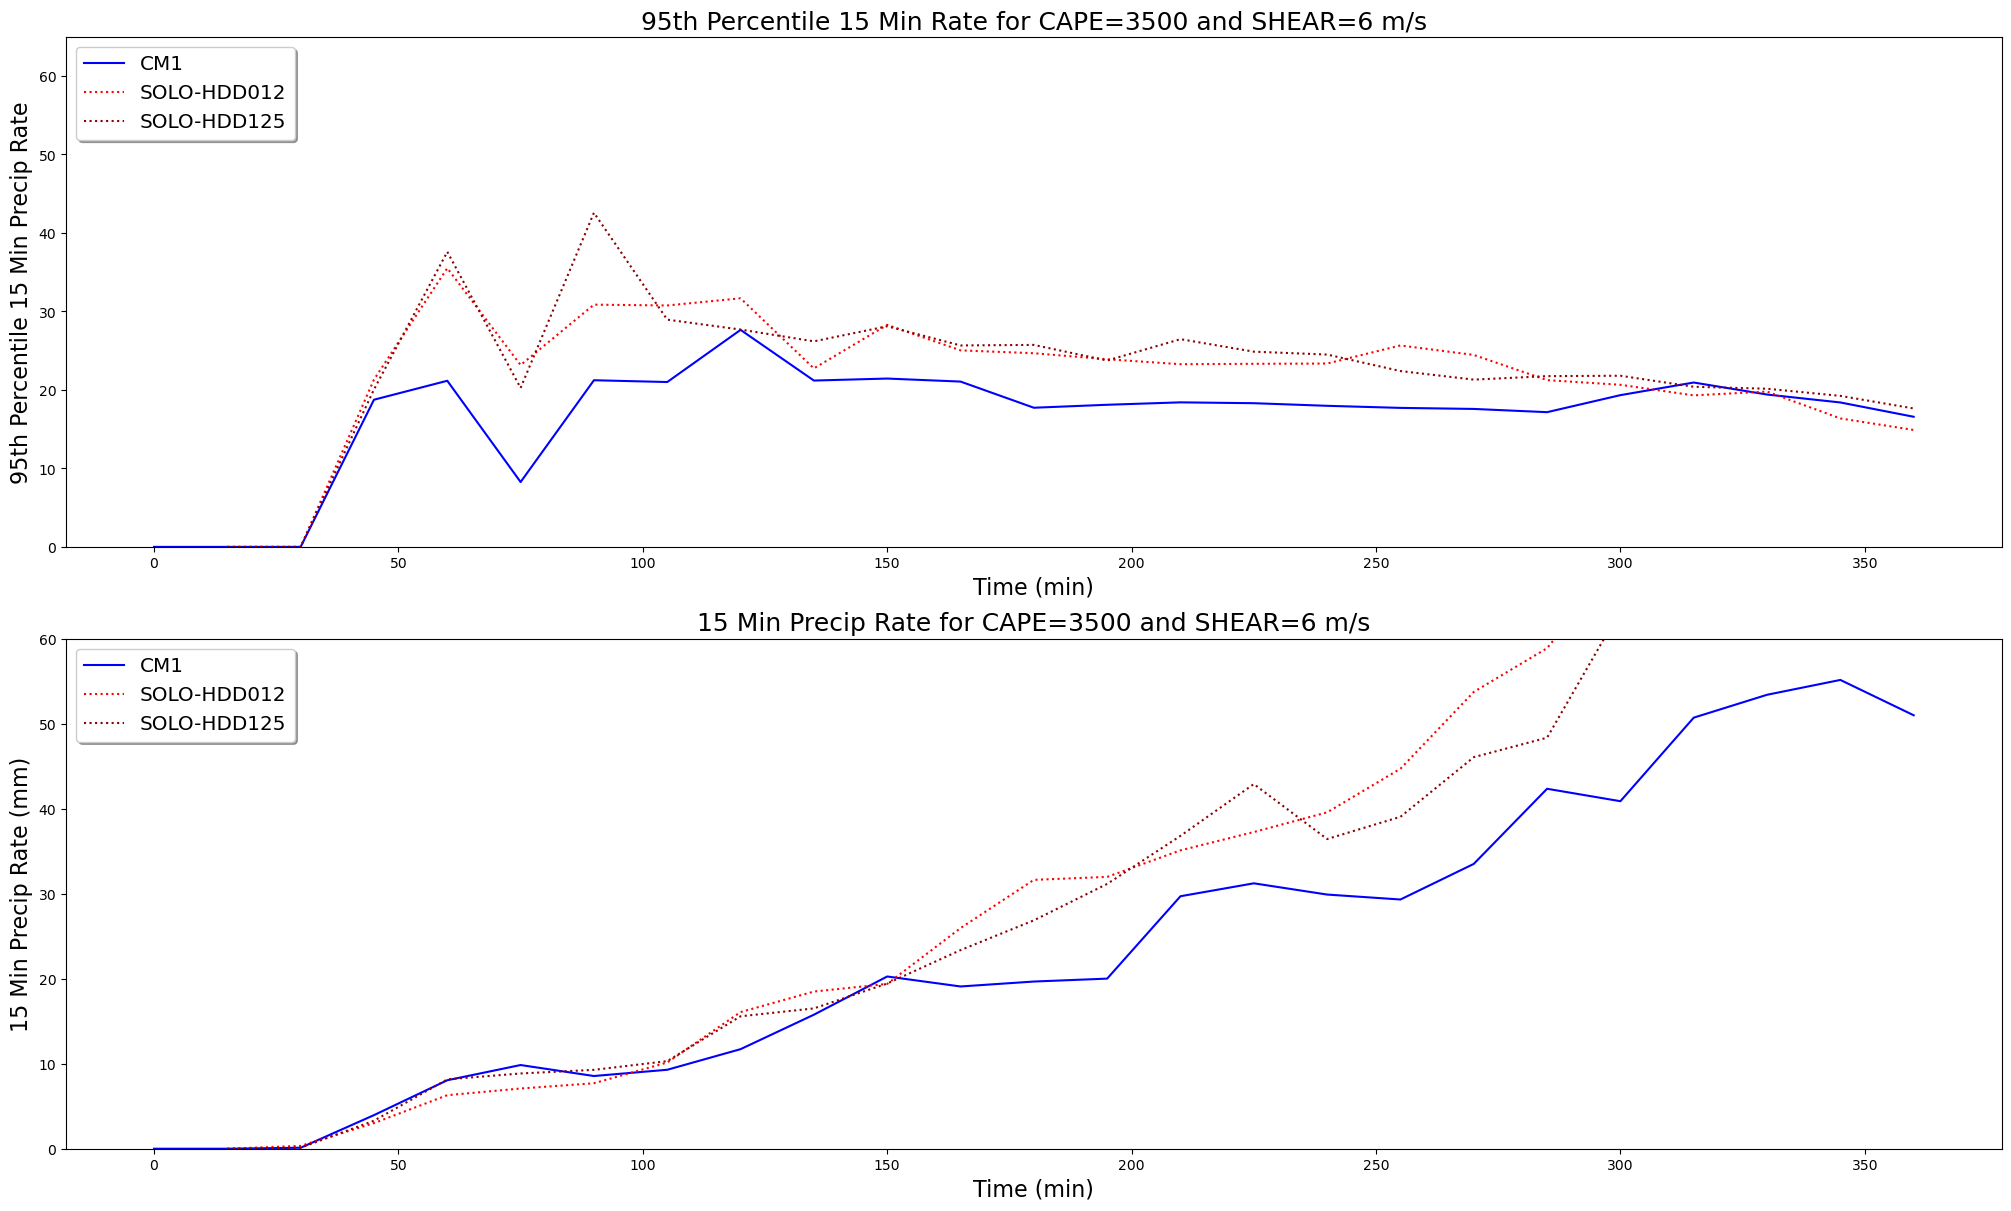

In [12]:
allcape = ("C1500","C2000","C2500","C3000","C3500")
allcape = ("C2000","C3500")
allshear = ("06",)

percent = 0.95

def plot_accum_prec2(models, allcape, allshear, all_times=False):
    
    x = np.arange(5)

    if all_times:
        plim = [ [3.0e5, 5.0e5], [4.0e5, 6.5e5] ]
    else:
        plim = [ [60, 60], [60, 60] ]
        qlim = [ [65, 65], [65, 65] ]

    labels = []
    
    for cape in allcape:
        labels.append("%s" % (cape[1:]))
        
    for m, shear in enumerate(allshear):
        
        for n, cape in enumerate(allcape):
            
            label = "%s_%s" % (cape, shear)
            
            fig, ax = plt.subplots(2,1, constrained_layout=True,figsize=(20,12))

            for key in models.keys():
                
                if all_times:
                    precip = models[key][label]['accum_prec']
                else:
                    inv       = models[key][label]['accum_prec'][::-1]
                    ppp       = np.zeros_like(inv)
                    precip    = np.ma.zeros_like(inv)
                    ppp[1:,:] = (inv[0:-1] - inv[1:])[::-1]
                    precip    = np.ma.masked_greater(ppp, 1.0e-1)
                
                    precip_percent = np.zeros((ppp.shape[0],))
                    
                    for k in np.arange(ppp.shape[0]):
                        ptime   = ppp[k].reshape(precip.shape[1]*precip.shape[2])
                        pthresh = ptime[ptime > 1.0e-01]
                        
                        psort   = np.sort(pthresh)
                        idx     = np.int(percent * psort.shape[0])
                        if idx > 0:
                            precip_percent[k] = np.mean(psort[idx:])
                        else:
                            precip_percent[k] = 0.0
                                            
                if key == 'solo':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='r', linestyle='-', label='SOLO')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='r', linestyle='-', label='SOLO')
                    
                if key == 'solo_hdd012':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='r', linestyle=':', label='SOLO-HDD012')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='r', linestyle=':', label='SOLO-HDD012')

                if key == 'solo_hdd125':
                    time = 15. + 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='darkred', linestyle=':', label='SOLO-HDD125')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='darkred', linestyle=':', label='SOLO-HDD125')

                if key == 'cm1_hdd012':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='b', linestyle='-', label='CM1')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='b', linestyle='-', label='CM1')
            
                if key == 'wrf':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='k', linestyle='-', label='WRF')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='k', linestyle='-', label='WRF')
                        
                if key == 'mpas':
                    time = 15*np.arange(models[key][label]['accum_prec'].shape[0])
                    ax[1].plot(time, precip.sum(axis=(1,2)), color='g', linestyle='-', label='MPAS')
                    if not all_times:
                        ax[0].plot(time, precip_percent, color='g', linestyle='-', label='MPAS')
                        
            ax[0].set_ylabel('95th Percentile 15 Min Precip Rate', fontsize=16)
            ax[1].set_ylabel('15 Min Precip Rate (mm)', fontsize=16)
            ax[0].set_title('95th Percentile 15 Min Rate for CAPE=%d and SHEAR=%d m/s' % (int(cape[1:]), int(shear)), fontsize=18)
            ax[1].set_title('15 Min Precip Rate for CAPE=%d and SHEAR=%d m/s' % (int(cape[1:]), int(shear)), fontsize=18)
            ax[0].set_ylim(0, qlim[m][n])
            ax[1].set_ylim(0, plim[m][n])
            
            for k in [0,1]:
                ax[k].set_xlabel('Time (min)', fontsize=16)
                
                legend = ax[k].legend(loc='upper left', shadow=True, fontsize='x-large')
            
            plt.savefig("Precipitation_Time_Series_Experiment_%s.png" % (label))
            plt.show()
            
###############################

plot_accum_prec2(models, allcape, allshear, all_times=False)

In [15]:
print(b)

NameError: name 'b' is not defined